# One Hot Encoding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<br/>

Dado el siguiente dataset, queremos poder predecir la altura de una persona dados su *genero* y *peso*:

In [2]:
data = pd.read_csv("examples/people-data.csv", usecols=["Gender", "Height", "Weight"])
data.head()

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61


- En `cm` y `kg` respectivamente

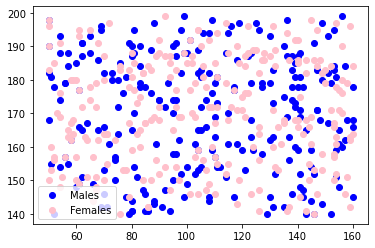

In [3]:
male_data = data.query("Gender == 'Male'")
female_data = data.query("Gender == 'Female'")

plt.scatter(male_data.Weight, male_data.Height, color="blue", label="Males")
plt.scatter(female_data.Weight, female_data.Height, color="pink", label="Females")
plt.legend()
plt.show()

Antes de diseñar nuestro modelo es importante "preparar" los datos para que tengan el formato adecuado para ser utilizados.

En particular, los datos de la columna `Gender` estan dados como `strings` y sabemos que utilizar datos de tipo numéricos sería más eficiente en nuestros algoritmos.

Teniendo en cuenta, tambien, que esta columna solo puede contener 2 valores posibles, una opcion es transformar cada uno de sus posibles valores a un numero. Esto se conoce como `LabelEncoding` y lo podemos realizar de la siguiente manera:

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_genders = label_encoder.fit_transform(data.Gender)

print(encoded_genders[:5])  # Muestro los primeros 5 valores

[1 1 0 0 1]


- El `LabelEncoder` transformó los valores "Male" a `1` y "Female" a `0`

### ¿Qué problemas tiene esta solución?

Como ahora los valores de la columna son numericos, los modelos podrian interpretar estos valores como ordinales, es decir, por ejemplo: `1 > 0` que equivale a `Male > Female`, que no es lo que queremos representar.

- Distinto seria el caso si nuestra columna representara, por ejemplo calificaciones de la forma: A, B, C, ...
    - En este caso, los datos si son ordinales: A > B > C > ...
    
- Utilizando otro ejemplo: 
    - si nuestra columna tomara 3 valores posibles, por ejemplo: `Argentina`, `Brasil` y `Uruguay`, usando **label encoding** obtendriamos valores como `{ Argentina: 0, Brasil: 1, Uruguay: 2 }` y nuestro modelo podria interpretar que:
        - `Uruguay - Brasil == Argentina` 
        - o que el promedio entre Argentina y Uruguay es Brasil

### One Hot Encoding
Para los casos como en nuestro ejemplo, usamos `One Hot Encoding`.

One Hot Encoding transforma los valores en un array de longitud igual a la cantidad de valores posibles de la columna en cuestion.

Por ejemplo, en nuestro caso, el valor `Male` estará asociado a un array `[0, 1]` y el valor `Female` al array `[1, 0]`.

Como se vé, cada valor tendrá asociado una posicion en el array, donde se indicará con un uno si pertenece a ese valor y un 0 en todas las demas posiciones.

Demostracion:

In [5]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
genders = data.Gender.values.reshape(-1, 1)

encoded_genders = one_hot_encoder.fit_transform(genders).toarray()

print(encoded_genders[:5])

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


- Se observa al array asociado a cada uno de los generos

Otra forma de lograr el mismo resultado que puede resultar mas facil de interpretar es utilizando la funcion `get_dummies()` de `Pandas`:

In [6]:
data = pd.get_dummies(data)
data.head()

,Height,Weight,Gender_Female,Gender_Male
0,174,96,0,1
1,189,87,0,1
2,185,110,1,0
3,195,104,1,0
4,149,61,0,1


- Se observa como se crearon 2 nuevas columnas en lugar de "Gender" que representan el array que identifica su valor correspondiente

<br/>

Finalmente con los datos ya preparados podemos continuar con el desarrollo de nuestro modelo...